In [81]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import plot_confusion_matrix

In [4]:
train_labels=[]
train_samples=[]

In [6]:
for _ in range(50):
    random_younger=randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older=randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
for _ in range(1000):
    random_younger=randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older=randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [10]:
train_sample_np=np.array(train_samples)
train_labels_np=np.array(train_labels)
train_samples, train_label=shuffle(train_sample_np,train_labels_np)

In [34]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_train_sample=scaler.fit_transform(train_samples.reshape(-1,1))

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [36]:
model=Sequential([
    Dense(units=16,input_shape=(1,),activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(units=2,activation='softmax')
    
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [39]:
model.fit(x=scaled_train_sample,y=train_label,batch_size=10,validation_split=0.1,epochs=30,shuffle=True,verbose=2)

Epoch 1/30
189/189 - 0s - loss: 0.2209 - accuracy: 0.9444 - val_loss: 0.1757 - val_accuracy: 0.9667
Epoch 2/30
189/189 - 0s - loss: 0.2203 - accuracy: 0.9487 - val_loss: 0.1731 - val_accuracy: 0.9571
Epoch 3/30
189/189 - 0s - loss: 0.2216 - accuracy: 0.9434 - val_loss: 0.1737 - val_accuracy: 0.9571
Epoch 4/30
189/189 - 0s - loss: 0.2183 - accuracy: 0.9460 - val_loss: 0.1768 - val_accuracy: 0.9571
Epoch 5/30
189/189 - 0s - loss: 0.2191 - accuracy: 0.9455 - val_loss: 0.1715 - val_accuracy: 0.9667
Epoch 6/30
189/189 - 0s - loss: 0.2177 - accuracy: 0.9466 - val_loss: 0.1762 - val_accuracy: 0.9429
Epoch 7/30
189/189 - 0s - loss: 0.2169 - accuracy: 0.9444 - val_loss: 0.1679 - val_accuracy: 0.9667
Epoch 8/30
189/189 - 0s - loss: 0.2146 - accuracy: 0.9481 - val_loss: 0.1747 - val_accuracy: 0.9571
Epoch 9/30
189/189 - 0s - loss: 0.2149 - accuracy: 0.9471 - val_loss: 0.1694 - val_accuracy: 0.9571
Epoch 10/30
189/189 - 0s - loss: 0.2139 - accuracy: 0.9471 - val_loss: 0.1685 - val_accuracy: 0.9571

In [40]:
test_labels=[]
test_samples=[]

In [41]:
for _ in range(50):
    random_younger=randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older=randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
for _ in range(1000):
    random_younger=randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_older=randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [47]:
X_test=np.array(test_samples)
y_test=np.array(test_labels)
X_test,y_test=shuffle(X_test,y_test)
scalar=MinMaxScaler(feature_range=(0,1))
X_test=scaler.fit_transform(X_test.reshape(-1,1))

In [60]:
predictions=model.predict(x=X_test,batch_size=10,verbose=0)
prediction_argmax=np.argmax(predictions,axis=-1)

In [72]:
diff=y_test-prediction_argmax
diff=list(diff)
print(len(diff))
accuracy=diff.count(0)/len(diff)*100
print(f'{accuracy}%')

2100
95.23809523809523%


In [74]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [97]:
cm=confusion_matrix(y_true=y_test,y_pred=prediction_argmax)

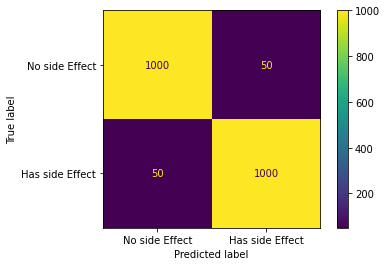

In [100]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
display_labels=['No side Effect','Has side Effect']
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=display_labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
disp = disp.plot()

plt.show()

In [101]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [102]:
import os.path
if os.path.isfile('model1.h5') is False:
    model.save('model1.h5')

In [103]:
from tensorflow.keras.models import load_model

In [104]:
new_model=load_model('model1.h5')
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [105]:
new_model.get_weights()

[array([[-0.43181172,  0.48419714,  0.4942046 ,  0.41629964, -0.4392074 ,
         -0.2407788 , -0.02676235,  0.38676146, -0.15502846, -0.55784553,
          0.4735404 ,  0.79654306,  0.63371575, -0.59111094,  0.07325336,
         -0.37181652]], dtype=float32),
 array([ 0.        , -0.27121925, -0.2756066 , -0.23258427,  0.        ,
         0.        ,  0.13225067, -0.21614526,  0.        ,  0.        ,
        -0.26414952, -0.16718115, -0.35295767,  0.        ,  0.30683747,
         0.        ], dtype=float32),
 array([[-5.36563993e-03,  3.51317734e-01, -2.40449369e-01,
         -1.81333110e-01,  4.17993963e-02,  3.16675574e-01,
         -1.36519462e-01, -1.42700970e-01,  3.10174257e-01,
          3.51164043e-02,  6.26881123e-02, -3.92118990e-02,
          2.83374697e-01,  6.11861050e-02,  2.67543525e-01,
         -1.40853673e-01,  2.75293857e-01,  8.41907859e-02,
          3.35372835e-01,  7.56747425e-02, -2.84562200e-01,
         -1.94722399e-01,  1.12013102e-01, -3.27821553e-01,
 